In [9]:
import numpy as np
import pandas as pd

# 读取数据集
data = pd.read_csv('train_dataset.csv')

# 提取特征和目标变量
X = data.drop(columns='PRICE').values  # 特征矩阵
y = data['PRICE'].values  # 目标变量

# 在 X 前添加一列 1 表示偏置项
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

# 手动实现特征标准化（除去第一列偏置项）
def standardize(X):
    means = X.mean(axis=0)# 计算每列的均值
    stds = X.std(axis=0)# 计算每列的标准差
    X_standardized = (X - means) / stds
    return X_standardized, means, stds

# 标准化特征（不包括偏置项列）
X_scaled, means, stds = standardize(X[:, 1:])
X_scaled = np.concatenate([np.ones((X_scaled.shape[0], 1)), X_scaled], axis=1)  # 重新添加偏置项

# 初始化权重
theta = np.zeros(X_scaled.shape[1])

# 超参数
learning_rate = 0.000001# 步长
iterations = 10000# 迭代次数

# 损失函数（均方误差）
def compute_mse(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    mse = (1 / (2 * len(y))) * np.dot(errors.T, errors)
    return mse

# 梯度下降算法
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    history = []
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        
        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        
        # 记录损失值
        if i % 100 == 0:
            mse = compute_mse(X, y, theta)
            history.append(mse)
    
    return theta, history

# 训练线性回归模型
theta_final, mse_history = gradient_descent(X_scaled, y, theta, learning_rate, iterations)

# 保存最终的权重到文件
np.save('linear_regression_model_weights.npy', theta_final)

# 输出最终的模型权重和损失值变化
print("Final weights (theta):", theta_final)
print("MSE history:", mse_history[:10])  # 显示前10次迭代的损失值


Final weights (theta): [ 0.22101626 -0.03552222  0.03317961 -0.0429096   0.01787674 -0.03905328
  0.06082716 -0.03448822  0.02273858 -0.03508487 -0.04219531 -0.045385
  0.03041862 -0.06714939]
MSE history: [289.3037363192431, 289.2312321609062, 289.1587631562106, 289.0863292729174, 289.01393047882453, 288.94156674176764, 288.86923802961945, 288.79694431028975, 288.7246855517257, 288.65246172191155]


Final weights (theta): [ 3.88872940e-16  2.27649064e+00 -4.45982559e-16 -6.71346886e+00
  4.87570283e-16  4.39411853e+00]
MSE history (first 10): [0.2242413829151435, 0.18280592533720047, 0.16798927463750926, 0.15457378244224096, 0.14241959915888874, 0.1314079633462487, 0.1214314662938528, 0.11239280063005876, 0.10420380637925689, 0.09678461096540414]


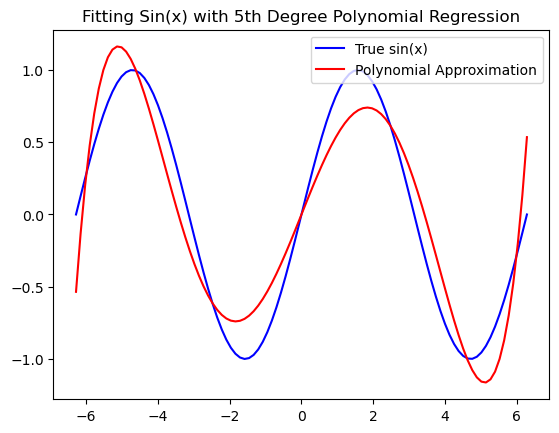

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 生成训练数据
def generate_data():
    x = np.linspace(-2 * np.pi, 2 * np.pi, 100)  # 在 [-2π, 2π] 之间生成 100 个点
    y = np.sin(x)  # sin(x) 值作为目标
    return x, y

# 特征扩展：将 x 扩展为 [1, x, x^2, x^3, x^4, x^5]
def feature_expansion(x, degree=5):
    X_expanded = np.ones((len(x), 1))  # 初始化包含偏置项 1 的矩阵
    for i in range(1, degree + 1):
        X_expanded = np.concatenate([X_expanded, x.reshape(-1, 1) ** i], axis=1)
    return X_expanded

# 标准化特征
def standardize(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    X_standardized = (X - means) / stds
    return X_standardized, means, stds

# 损失函数（均方误差）
def compute_mse(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    mse = (1 / (2 * len(y))) * np.dot(errors.T, errors)
    return mse

# 梯度下降算法
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    history = []
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        
        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient
        
        # 记录损失值
        if i % 100 == 0:
            mse = compute_mse(X, y, theta)
            history.append(mse)
    
    return theta, history

# 生成数据并扩展特征
x, y = generate_data()
X = feature_expansion(x, degree=5)

# 标准化特征（不包括偏置项列）
X_scaled, means, stds = standardize(X[:, 1:])
X_scaled = np.concatenate([np.ones((X_scaled.shape[0], 1)), X_scaled], axis=1)  # 重新添加偏置项

# 初始化权重
theta = np.zeros(X_scaled.shape[1])

# 超参数
learning_rate = 0.1  # 学习率
iterations = 10000

# 训练线性回归模型
theta_final, mse_history = gradient_descent(X_scaled, y, theta, learning_rate, iterations)

# 输出结果
print("Final weights (theta):", theta_final)
print("MSE history (first 10):", mse_history[:10])

# 预测并绘图
predictions = X_scaled.dot(theta_final)

plt.plot(x, y, label='True sin(x)', color='b')
plt.plot(x, predictions, label='Polynomial Approximation', color='r')
plt.legend()
plt.title('Fitting Sin(x) with 5th Degree Polynomial Regression')
plt.show()
